<a href="https://colab.research.google.com/github/tamer017/ML-Assessments/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kmeans

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.decomposition import PCA
import plotly.express as px
from scipy.spatial.distance import cdist
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import normaltest, zscore
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from operator import itemgetter
%matplotlib inline

In [3]:

plt.figure(figsize=(16,8))
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, method = [], num_clusters = 0,kmean = False):
    # color = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan","yellow","black","lime","magenta"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
      sns.scatterplot(X[:, 0], X[:, 1], hue=np.zeros((X.shape[0],)), legend='full',palette="Set1")  
    else:
      labels = method.labels_
      if (num_clusters > 45):
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels,palette="Set1").legend_.remove() 
      else: 
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels, legend='auto',palette="Set1")  
        # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,ncol=3)
      if (kmean):
        for i in range(num_clusters):
            plt.scatter(method.cluster_centers_[i][0], method.cluster_centers_[i][1], c = "black", marker = 'x', s = 100)   
    plt.show()
  
          

<Figure size 1152x576 with 0 Axes>

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [4]:
def K_mean(X, min_clusters = 2, max_clusters = 20): 
  distortion_functions = []
  silhouette_scores = []
  inertias = []
  for n_clusters in range(min_clusters, max_clusters+1):
      Kmean = KMeans(n_clusters = n_clusters)
      Kmean.fit(X)
      if X.shape[1] == 2:
        display_cluster(X, method = Kmean, num_clusters = n_clusters,kmean = True)
      distortion_function = sum(np.min(cdist(X, Kmean.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
      inertia = Kmean.inertia_ 
      inertias.append(inertia)
      distortion_functions.append(distortion_function) 
      silhouette_scoree = silhouette_score(X, Kmean.labels_)
      silhouette_scores.append(silhouette_scoree)
      print("For", n_clusters, "clusters,", "the average silhouette_score is :", silhouette_scoree, ", the destortion function is :", distortion_function, ",and inertia is :",inertia)
      print(pd.DataFrame(Kmean.labels_).value_counts(normalize = True)*100)
      plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), distortion_functions, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method for distortion showing the optimal k')
  plt.xticks(range(min_clusters,max_clusters+1))
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), inertias, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method for inertia showing the optimal k')
  plt.xticks(range(min_clusters,max_clusters+1))
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), silhouette_scores, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Silhouette score ')
  plt.title('The Elbow Method for silhouette score showing the optimal k')
  plt.xticks(range(min_clusters,max_clusters+1))
  plt.show()
  index, element = max(enumerate(silhouette_scores), key=itemgetter(1))
  max_silhouette_score_kmean = {"n_clusters":index+2,"silhouette_score":element}
  return max_silhouette_score_kmean

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



In [6]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
# display_cluster(Multi_blob_Data)

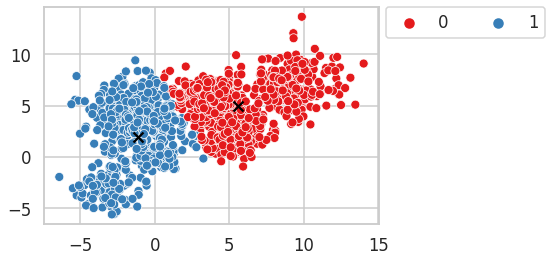

For 2 clusters, the average silhouette_score is : 0.4751544541991239 , the destortion function is : 3.0296089763225997 ,and inertia is : 16716.61917540343
0    56.551724
1    43.448276
dtype: float64


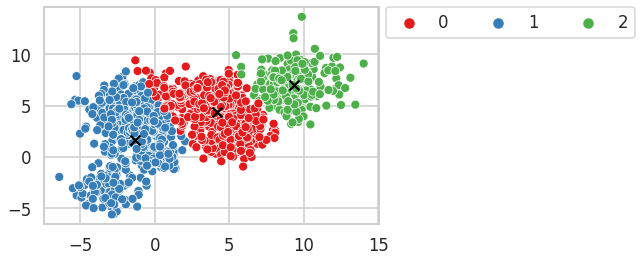

For 3 clusters, the average silhouette_score is : 0.43631793714185435 , the destortion function is : 2.56261722708342 ,and inertia is : 12094.797074229678
0    46.965517
1    39.931034
2    13.103448
dtype: float64


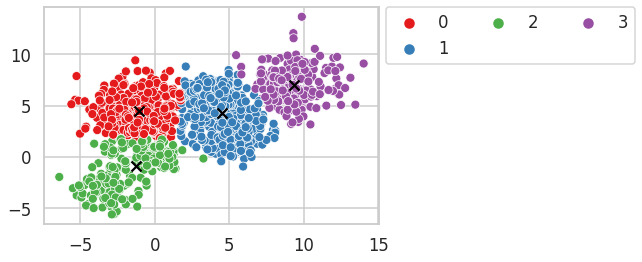

For 4 clusters, the average silhouette_score is : 0.4628725400351352 , the destortion function is : 2.1066915032395044 ,and inertia is : 7812.191659760554
1    43.448276
0    23.517241
2    20.068966
3    12.965517
dtype: float64


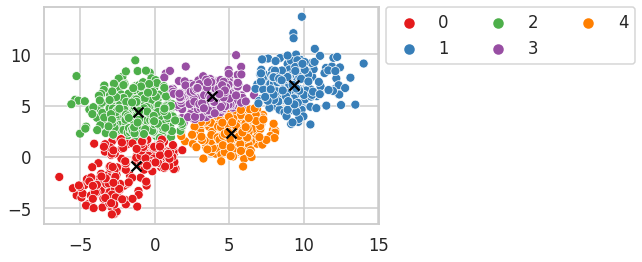

For 5 clusters, the average silhouette_score is : 0.48100602217073096 , the destortion function is : 1.7169227547484112 ,and inertia is : 5600.217515342452
3    25.034483
2    22.827586
0    19.862069
4    19.379310
1    12.896552
dtype: float64


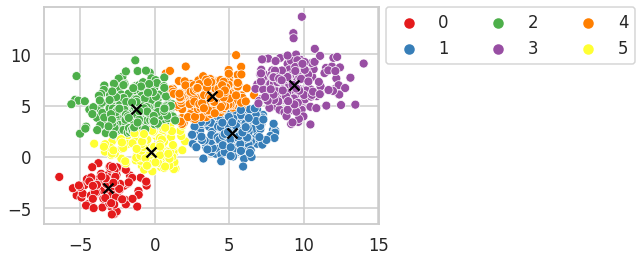

For 6 clusters, the average silhouette_score is : 0.48614459735646176 , the destortion function is : 1.5043461290060023 ,and inertia is : 4310.421659203395
4    25.241379
2    20.344828
1    19.172414
5    15.586207
3    12.896552
0     6.758621
dtype: float64


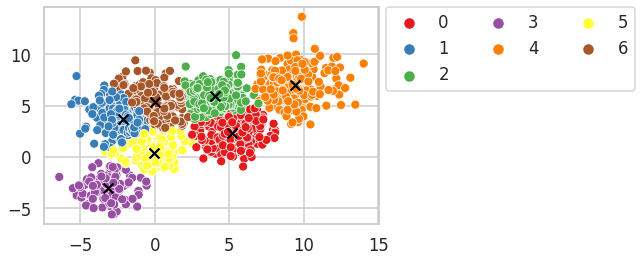

For 7 clusters, the average silhouette_score is : 0.46340972197949165 , the destortion function is : 1.4110078118049556 ,and inertia is : 3811.1633360756578
2    23.517241
0    18.965517
5    13.931034
4    12.827586
1    12.137931
6    11.862069
3     6.758621
dtype: float64


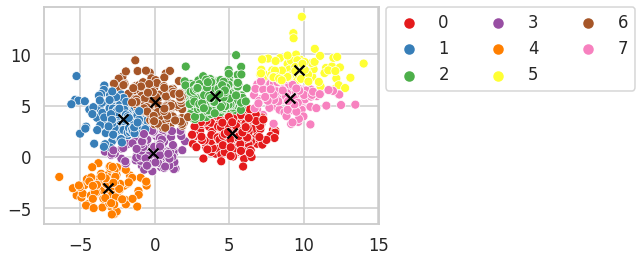

For 8 clusters, the average silhouette_score is : 0.4444601357188936 , the destortion function is : 1.3499443027129143 ,and inertia is : 3445.5420986614927
2    23.448276
0    18.689655
3    13.862069
1    12.137931
6    11.862069
7     7.517241
4     6.758621
5     5.724138
dtype: float64


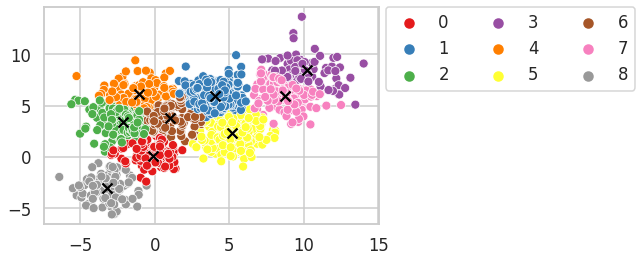

For 9 clusters, the average silhouette_score is : 0.4507207077724085 , the destortion function is : 1.2827111712418153 ,and inertia is : 3085.1326212704626
1    23.034483
5    18.275862
0    12.689655
2    10.482759
7     8.206897
4     7.931034
6     7.724138
8     6.620690
3     5.034483
dtype: float64


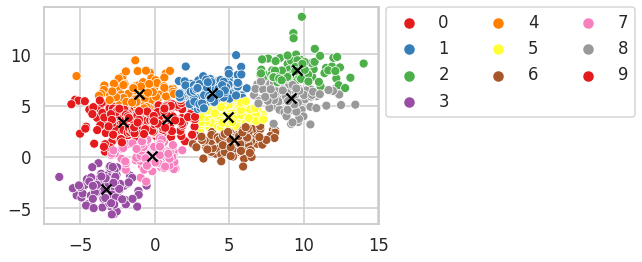

For 10 clusters, the average silhouette_score is : 0.39757268523930384 , the destortion function is : 1.2229558544842514 ,and inertia is : 2829.2273765941363
1    19.448276
7    12.758621
6    11.724138
5    11.103448
9    10.344828
4     7.862069
0     7.241379
8     7.172414
3     6.482759
2     5.862069
dtype: float64


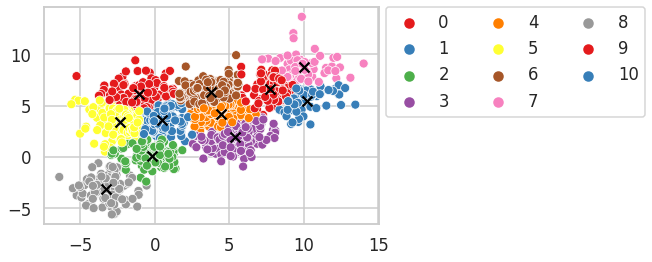

For 11 clusters, the average silhouette_score is : 0.3938370395201961 , the destortion function is : 1.1840646369449368 ,and inertia is : 2625.5231628811352
6     18.137931
3     14.137931
2     12.689655
4     10.000000
5      9.172414
1      8.000000
9      7.793103
8      6.482759
0      5.172414
7      4.275862
10     4.137931
dtype: float64


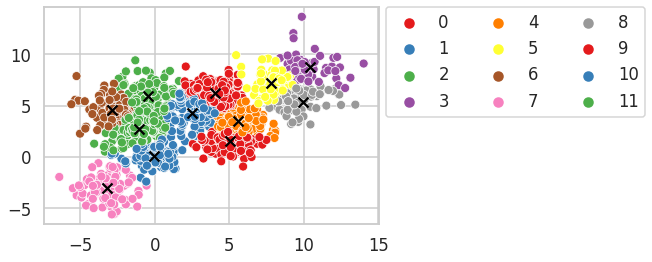

For 12 clusters, the average silhouette_score is : 0.3900961853101971 , the destortion function is : 1.1406534164165953 ,and inertia is : 2438.0495422444287
0     18.206897
1     11.931034
9      9.862069
4      9.586207
11     9.241379
2      8.000000
10     7.310345
7      6.620690
6      6.000000
5      4.896552
8      4.620690
3      3.724138
dtype: float64


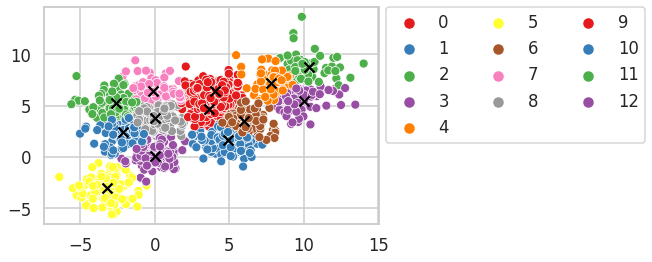

For 13 clusters, the average silhouette_score is : 0.37464891747685997 , the destortion function is : 1.1080116690204205 ,and inertia is : 2270.2670788292994
9     15.172414
3     11.862069
10    11.103448
8      8.896552
0      8.758621
6      7.655172
5      6.620690
1      6.275862
11     5.517241
7      5.103448
4      4.827586
12     4.551724
2      3.655172
dtype: float64


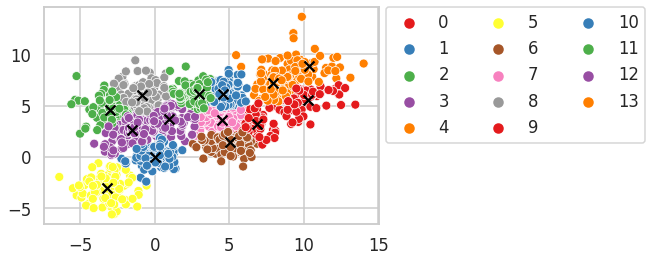

For 14 clusters, the average silhouette_score is : 0.36996611827344794 , the destortion function is : 1.064682881587563 ,and inertia is : 2131.051956961492
10    12.068966
1     11.586207
2      9.310345
6      9.034483
7      8.482759
3      8.137931
8      6.965517
5      6.620690
12     5.862069
4      5.034483
11     4.896552
0      4.482759
9      3.931034
13     3.586207
dtype: float64


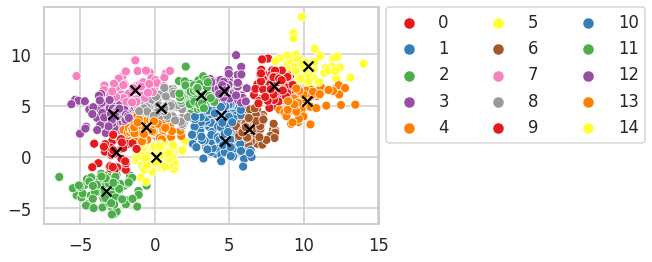

For 15 clusters, the average silhouette_score is : 0.35823282799363493 , the destortion function is : 1.0340064111017486 ,and inertia is : 2007.25022545531
5     11.172414
2     10.344828
12     9.379310
1      8.965517
10     8.344828
13     7.655172
8      6.068966
6      6.000000
11     5.931034
3      5.586207
9      5.172414
7      4.965517
4      4.137931
14     3.655172
0      2.620690
dtype: float64


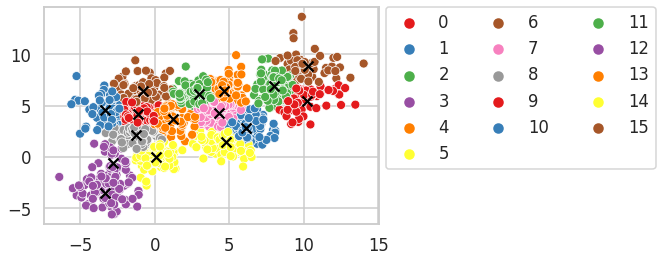

For 16 clusters, the average silhouette_score is : 0.3544198432246938 , the destortion function is : 1.00264399590402 ,and inertia is : 1887.3036511193711
5     10.758621
4      9.517241
11     8.965517
7      8.689655
14     8.275862
1      7.310345
0      6.758621
6      5.310345
3      5.241379
2      5.172414
8      4.965517
13     4.965517
9      4.137931
10     3.931034
15     3.655172
12     2.344828
dtype: float64


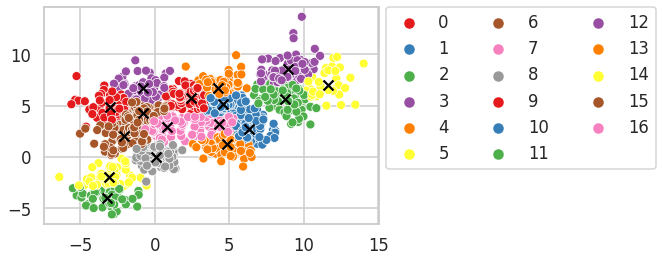

For 17 clusters, the average silhouette_score is : 0.3520215717663961 , the destortion function is : 0.9826665692293105 ,and inertia is : 1796.484511233492
8     10.965517
13     9.724138
1      8.275862
15     7.172414
0      6.896552
4      6.896552
7      6.344828
10     6.068966
11     5.655172
6      5.103448
3      4.896552
9      4.344828
12     4.137931
16     4.137931
5      3.586207
2      3.379310
14     2.413793
dtype: float64


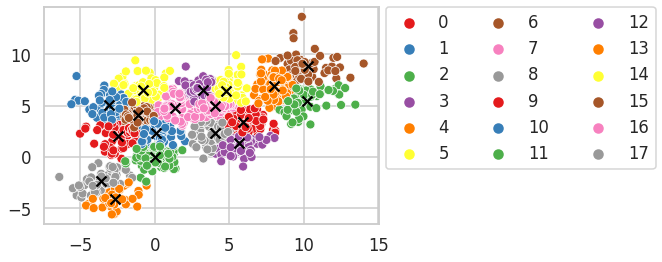

For 18 clusters, the average silhouette_score is : 0.3505764803037526 , the destortion function is : 0.9492314541867413 ,and inertia is : 1709.6278222215615
11    10.896552
14     7.793103
7      7.655172
3      7.241379
12     6.482759
8      6.344828
0      6.206897
15     6.137931
13     5.103448
16     4.758621
5      4.758621
1      4.275862
2      4.137931
9      4.068966
10     3.793103
17     3.793103
6      3.724138
4      2.827586
dtype: float64


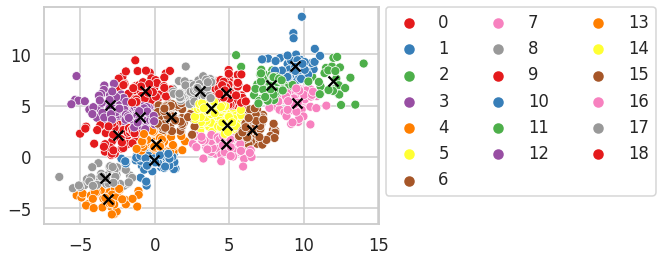

For 19 clusters, the average silhouette_score is : 0.328334515820469 , the destortion function is : 0.9365388949108842 ,and inertia is : 1639.1577218465432
0     9.517241
1     9.172414
8     8.206897
16    6.827586
14    6.689655
12    6.689655
5     6.620690
18    5.103448
15    4.896552
6     4.551724
3     4.068966
9     4.068966
2     4.000000
13    3.931034
7     3.862069
10    3.379310
17    3.310345
4     3.241379
11    1.862069
dtype: float64


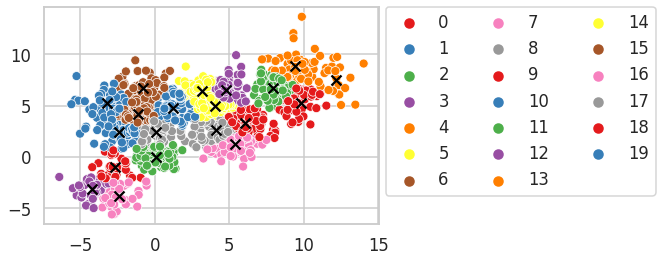

For 20 clusters, the average silhouette_score is : 0.3528700780980526 , the destortion function is : 0.9123012131096263 ,and inertia is : 1543.3520354419327
2     10.620690
5      7.724138
12     7.655172
14     7.448276
7      6.965517
6      6.551724
8      6.344828
0      6.000000
1      4.620690
11     4.344828
10     4.275862
17     4.206897
15     4.137931
4      3.586207
18     3.517241
19     3.103448
16     2.689655
3      2.620690
9      2.068966
13     1.517241
dtype: float64


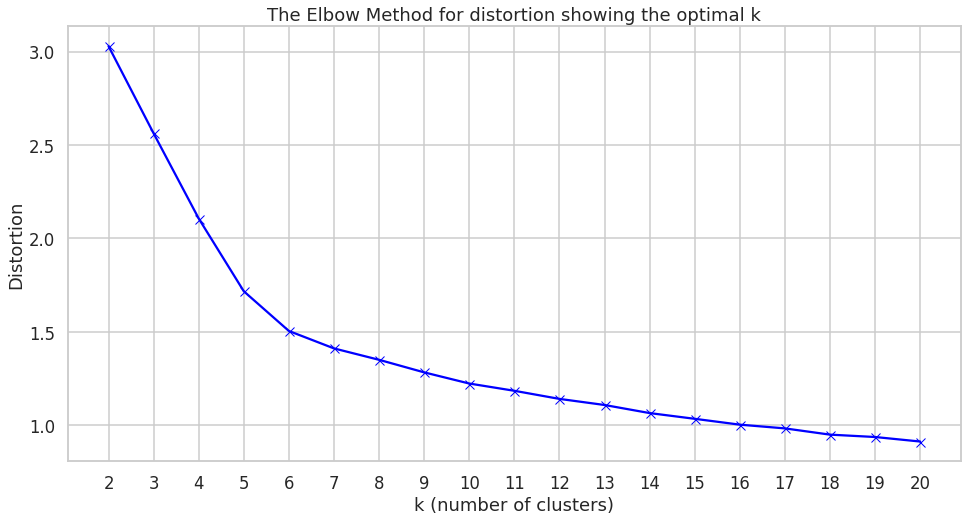

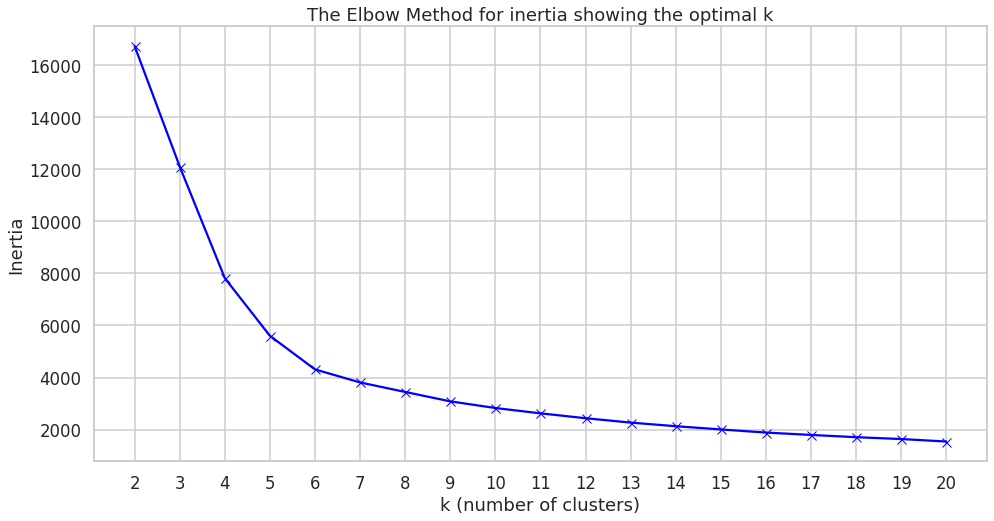

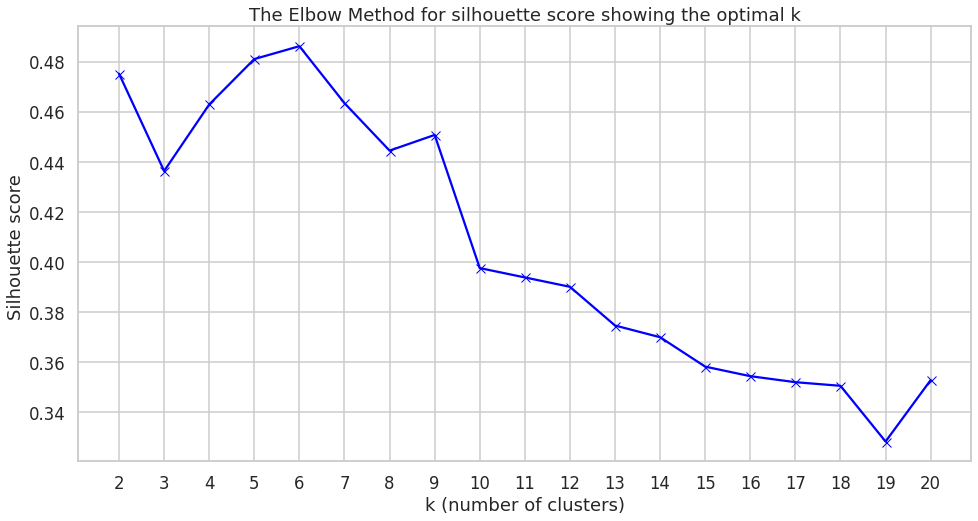

{'n_clusters': 6, 'silhouette_score': 0.48614459735646176}

In [36]:
K_mean(Multi_blob_Data) # 6

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [8]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


For 2 clusters, the average silhouette_score is : 0.6810461692117462 , the destortion function is : 0.8555777695266533 ,and inertia is : 152.3479517603579
1    64.666667
0    35.333333
dtype: float64
For 3 clusters, the average silhouette_score is : 0.5528190123564095 , the destortion function is : 0.6480304904934434 ,and inertia is : 78.851441426146
0    41.333333
1    33.333333
2    25.333333
dtype: float64
For 4 clusters, the average silhouette_score is : 0.49805050499728737 , the destortion function is : 0.5573847727333312 ,and inertia is : 57.22847321428572
0    33.333333
3    26.666667
1    21.333333
2    18.666667
dtype: float64
For 5 clusters, the average silhouette_score is : 0.48874888709310566 , the destortion function is : 0.5096521951118286 ,and inertia is : 46.446182051282065
0    33.333333
1    26.000000
3    16.666667
2    16.000000
4     8.000000
dtype: float64
For 6 clusters, the average silhouette_score is : 0.36483400396700255 , the destortion function is : 0.467073

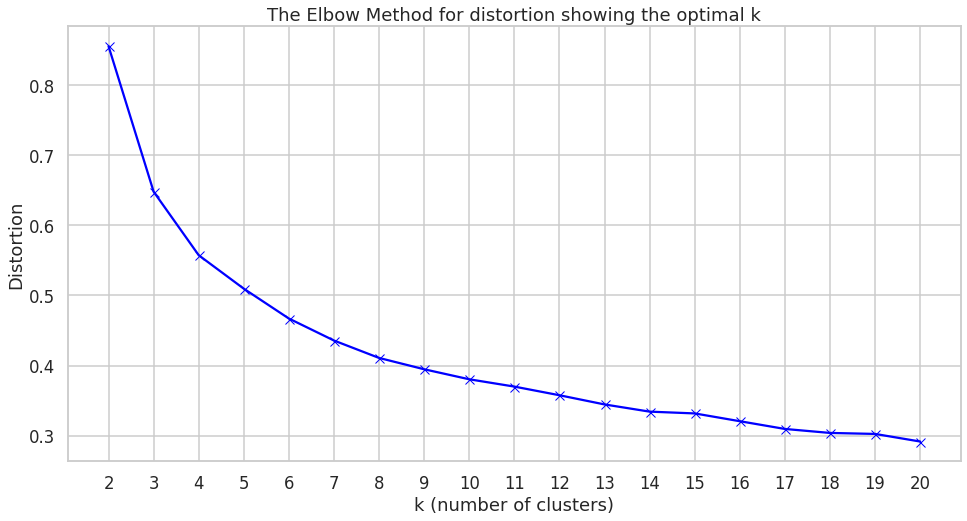

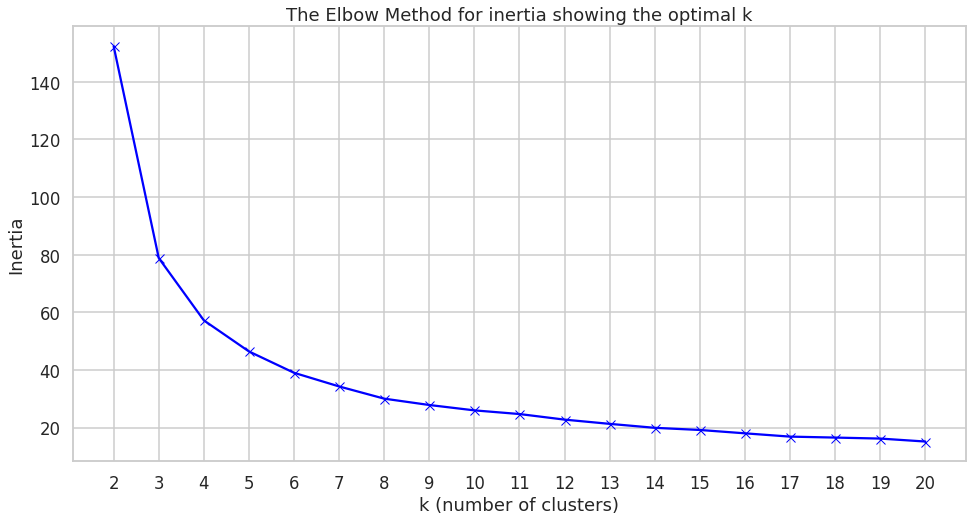

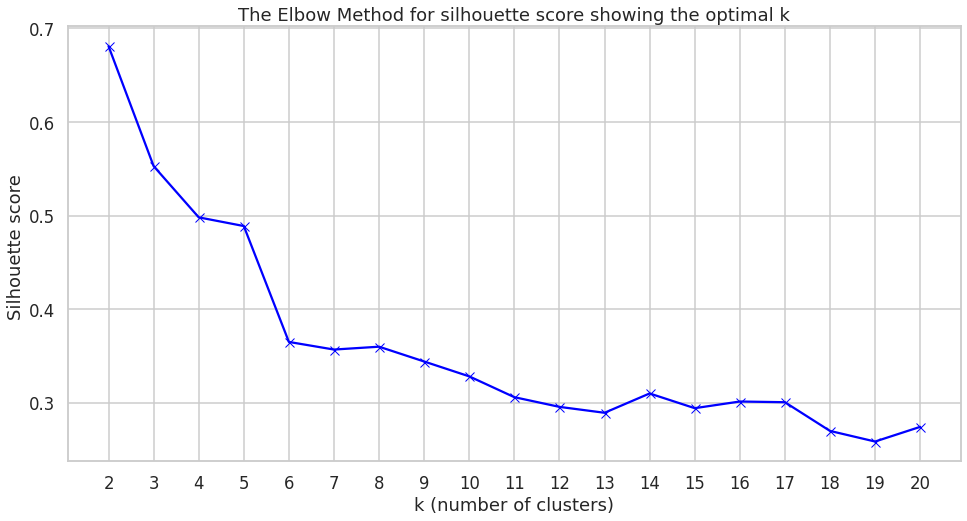

{'n_clusters': 2, 'silhouette_score': 0.6810461692117462}

In [35]:
K_mean(iris_data.data) # 2

### Features relations

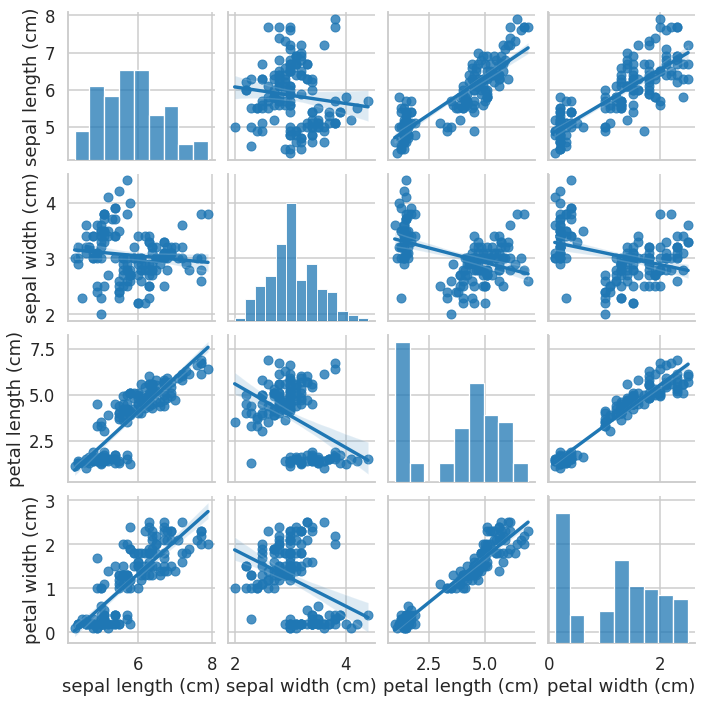

In [11]:
sns.pairplot(pd.DataFrame(iris_data.data,columns = iris_data.feature_names), kind="reg")
plt.show()

In [25]:
df = pd.DataFrame(iris_data.data,columns = iris_data.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_data.data)


For 2 clusters, the average silhouette_score is : 0.5817500491982808 , the destortion function is : 1.0601245127745642 ,and inertia is : 222.36170496502302
1    66.666667
0    33.333333
dtype: float64
For 3 clusters, the average silhouette_score is : 0.45994823920518635 , the destortion function is : 0.8601870282518927 ,and inertia is : 139.82049635974982
1    35.333333
0    33.333333
2    31.333333
dtype: float64
For 4 clusters, the average silhouette_score is : 0.3882200962165986 , the destortion function is : 0.7783277431704173 ,and inertia is : 114.3048033185676
1    37.333333
3    29.333333
2    18.666667
0    14.666667
dtype: float64
For 5 clusters, the average silhouette_score is : 0.34196204462656143 , the destortion function is : 0.6972833428155492 ,and inertia is : 90.8581943208666
0    32.000000
3    18.666667
1    16.666667
4    16.666667
2    16.000000
dtype: float64
For 6 clusters, the average silhouette_score is : 0.3231038108603603 , the destortion function is : 0.65830

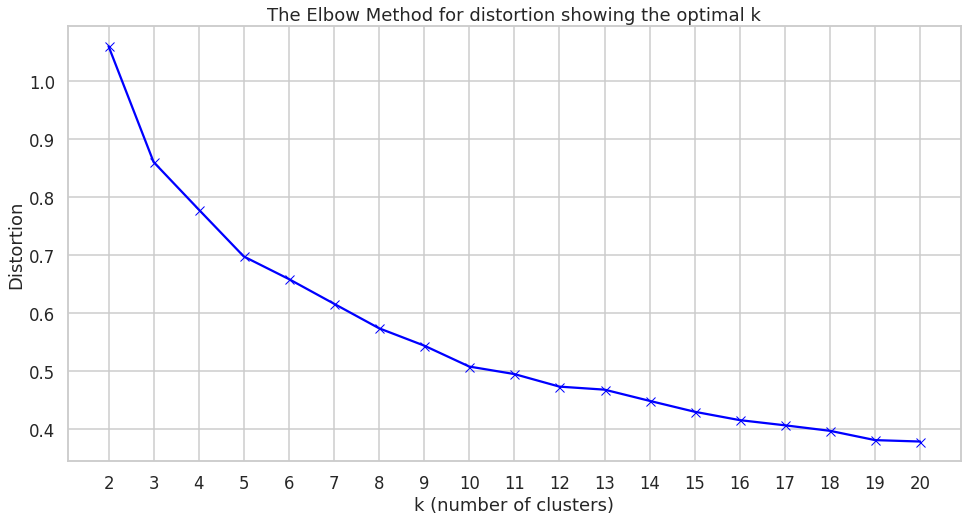

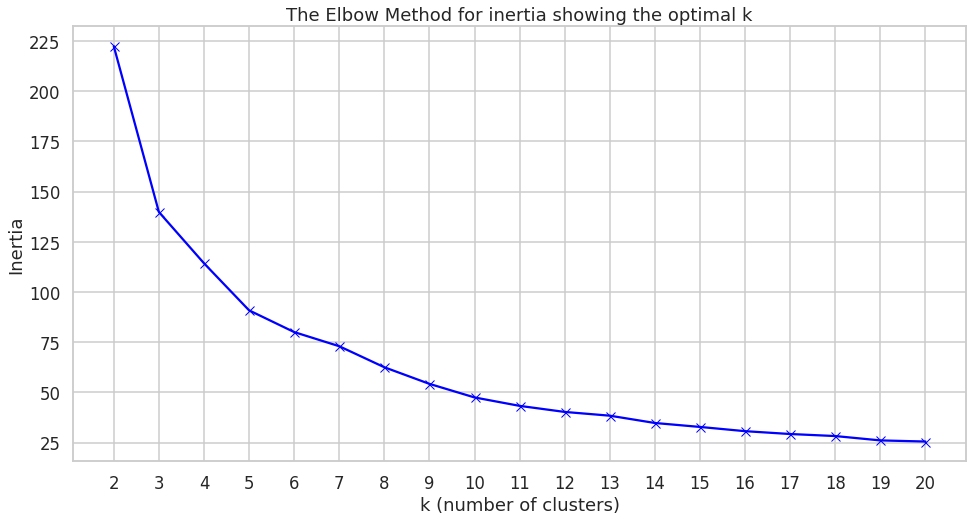

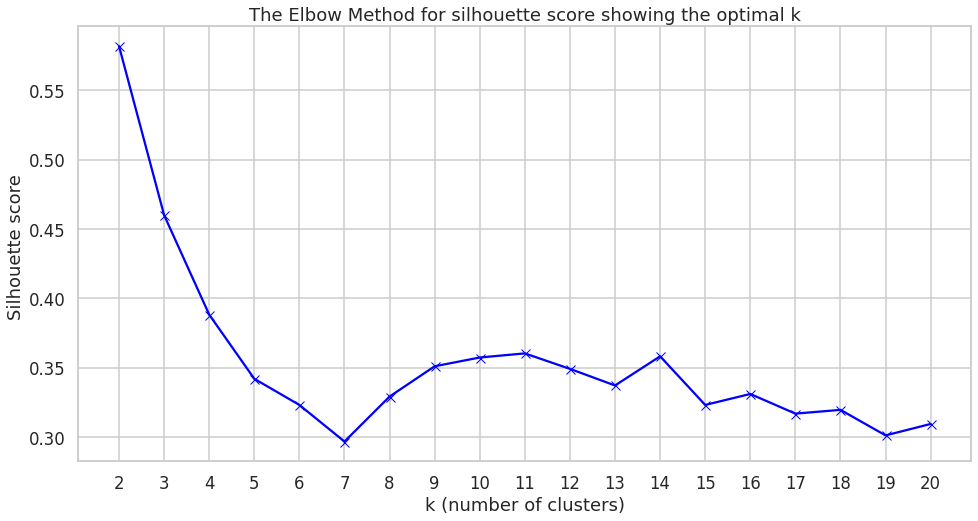

{'n_clusters': 2, 'silhouette_score': 0.5817500491982808}

In [38]:
K_mean(scaled_data) # 2 how evere lower silhouette_score and higher destortion and inertia 

In [39]:
pca = PCA(n_components=3)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
data_3d = pd.DataFrame(transformed,columns = ["1",'2',"3"])
df = px.data.iris()
fig = px.scatter_3d(data_3d, x='1', y='2', z='3',
              color='3')
fig.show()

For 2 clusters, the average silhouette_score is : 0.6869258005156983 , the destortion function is : 0.8377377909845138 ,and inertia is : 148.79893436516977
1    64.666667
0    35.333333
dtype: float64
For 3 clusters, the average silhouette_score is : 0.5630437008750581 , the destortion function is : 0.6267189018430327 ,and inertia is : 75.31893784137087
1    41.333333
0    33.333333
2    25.333333
dtype: float64
For 4 clusters, the average silhouette_score is : 0.5112364264165211 , the destortion function is : 0.535868210626413 ,and inertia is : 53.752385281497205
1    33.333333
0    27.333333
2    21.333333
3    18.000000
dtype: float64
For 5 clusters, the average silhouette_score is : 0.5019272401139246 , the destortion function is : 0.48531063528535334 ,and inertia is : 43.24571529882546
1    33.333333
2    25.333333
0    16.666667
4    16.666667
3     8.000000
dtype: float64
For 6 clusters, the average silhouette_score is : 0.38316771649137144 , the destortion function is : 0.44166

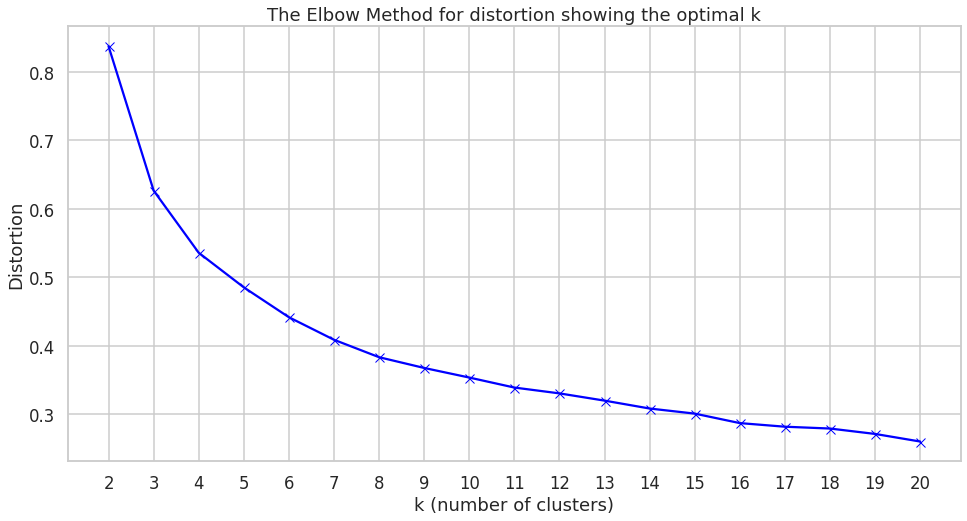

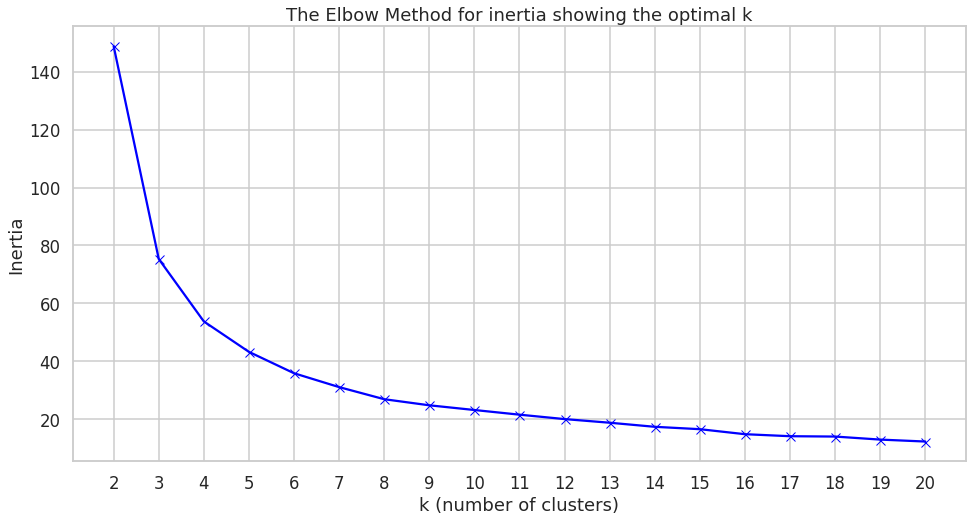

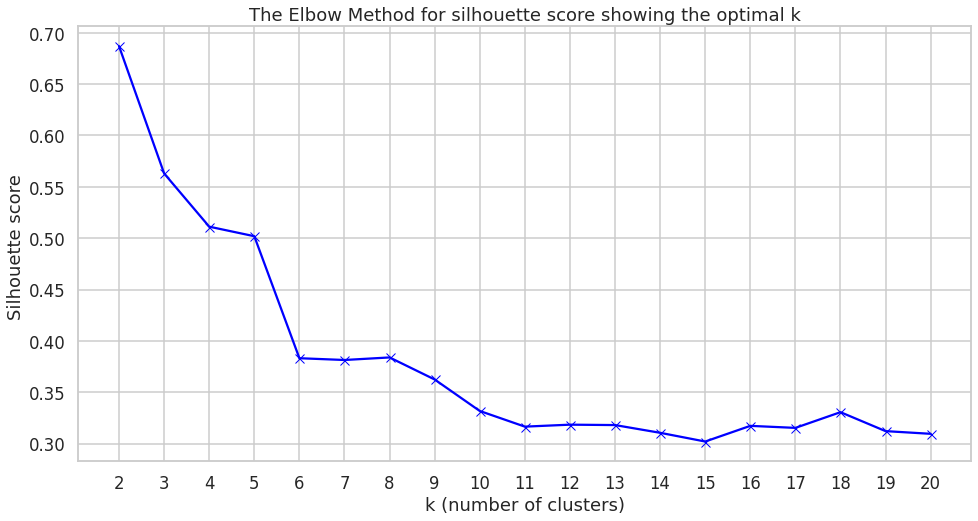

{'n_clusters': 2, 'silhouette_score': 0.6869258005156983}

In [42]:
K_mean(data_3d.values) # 2 the best silhouette_score and from the figures

In [41]:
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
data_2d = pd.DataFrame(transformed,columns = ["1",'2'])
df = px.data.iris()
fig = px.scatter(data_2d,x = "1",y = "2",
              color='2')
fig.show()

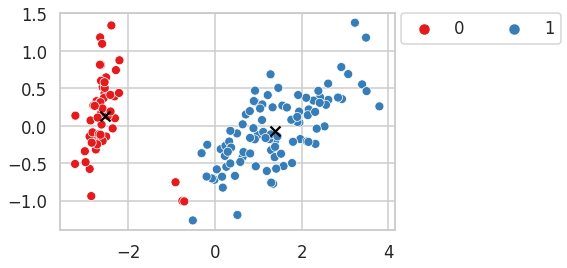

For 2 clusters, the average silhouette_score is : 0.7056703225102109 , the destortion function is : 0.7843727059296363 ,and inertia is : 137.1553011281841


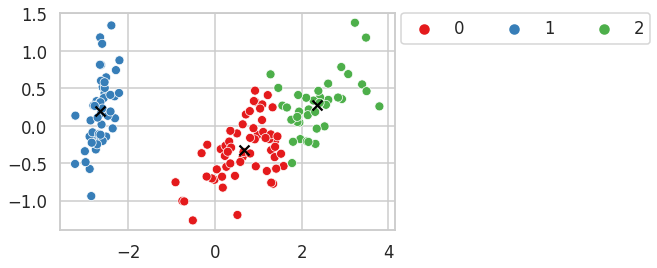

For 3 clusters, the average silhouette_score is : 0.597676421954799 , the destortion function is : 0.5573542515215594 ,and inertia is : 63.81994202200126


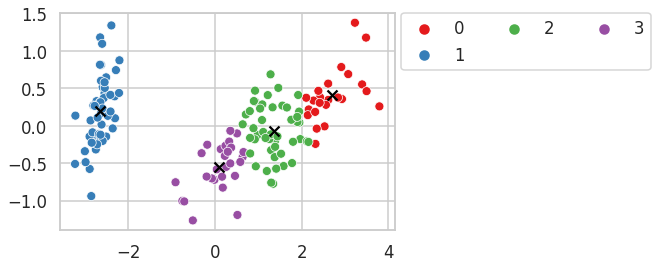

For 4 clusters, the average silhouette_score is : 0.5591106064519759 , the destortion function is : 0.4675426565779325 ,and inertia is : 42.266434609462955


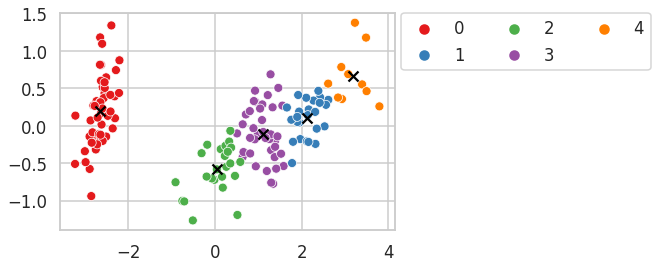

For 5 clusters, the average silhouette_score is : 0.5515547785513799 , the destortion function is : 0.41380953994746106 ,and inertia is : 33.4802350632165


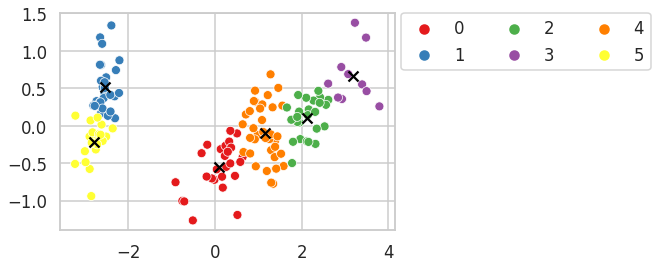

For 6 clusters, the average silhouette_score is : 0.4459451820293749 , the destortion function is : 0.3634110879159928 ,and inertia is : 26.161479724871022


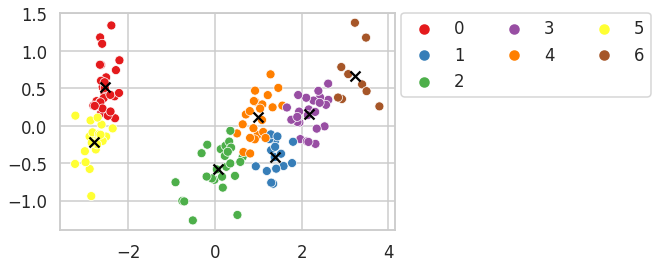

For 7 clusters, the average silhouette_score is : 0.437439232459205 , the destortion function is : 0.3312672432251571 ,and inertia is : 22.04528486941268


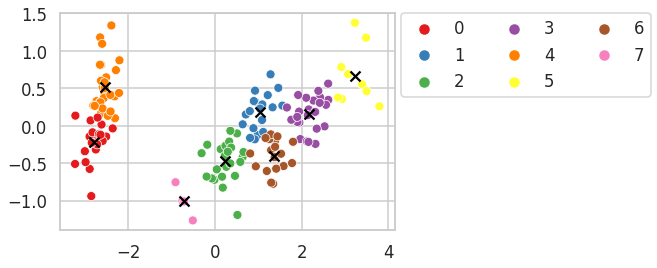

For 8 clusters, the average silhouette_score is : 0.45420278592654917 , the destortion function is : 0.3032947869347546 ,and inertia is : 17.933816262350334


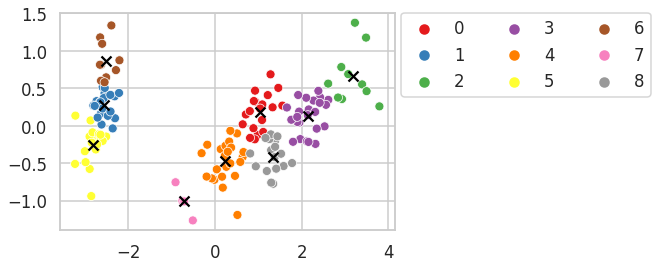

For 9 clusters, the average silhouette_score is : 0.434897689775161 , the destortion function is : 0.28683634480936077 ,and inertia is : 15.777089727892907


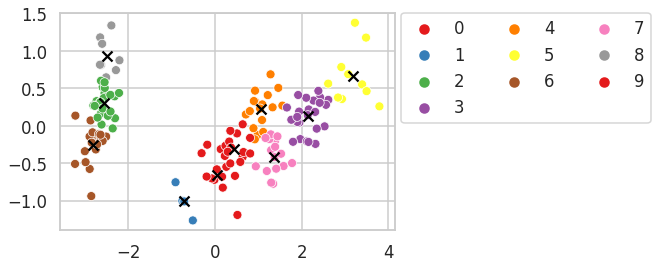

For 10 clusters, the average silhouette_score is : 0.4195274155562169 , the destortion function is : 0.2727547127458044 ,and inertia is : 14.297401315855764


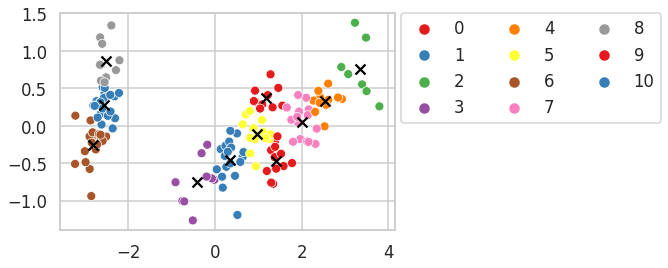

For 11 clusters, the average silhouette_score is : 0.38241921583146166 , the destortion function is : 0.2591905571801145 ,and inertia is : 12.81360224305718


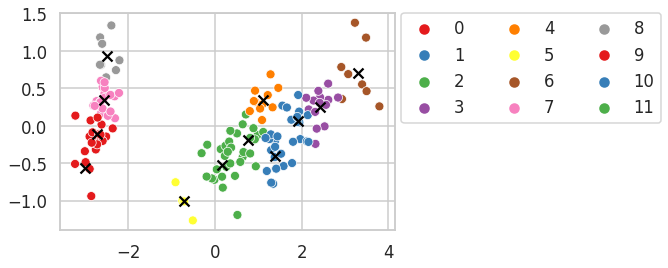

For 12 clusters, the average silhouette_score is : 0.394607647541746 , the destortion function is : 0.2430722636375368 ,and inertia is : 11.478027108057649


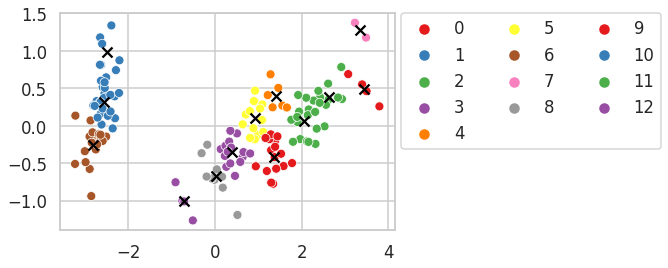

For 13 clusters, the average silhouette_score is : 0.4085119530717512 , the destortion function is : 0.23756473647927048 ,and inertia is : 10.609642090241245


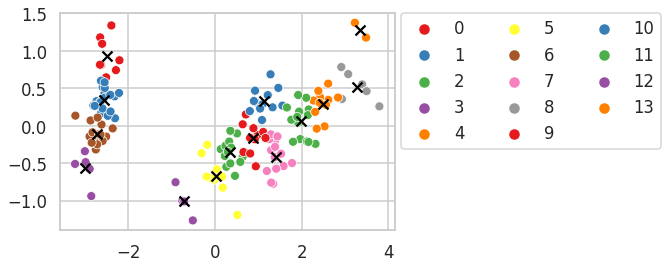

For 14 clusters, the average silhouette_score is : 0.3837016110536685 , the destortion function is : 0.22327800610671375 ,and inertia is : 9.649543607983095


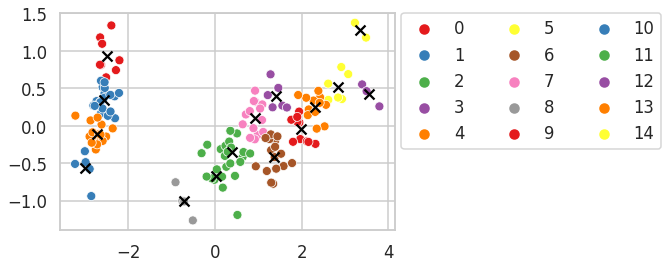

For 15 clusters, the average silhouette_score is : 0.39374566933823424 , the destortion function is : 0.2191226381604876 ,and inertia is : 8.903552615988884


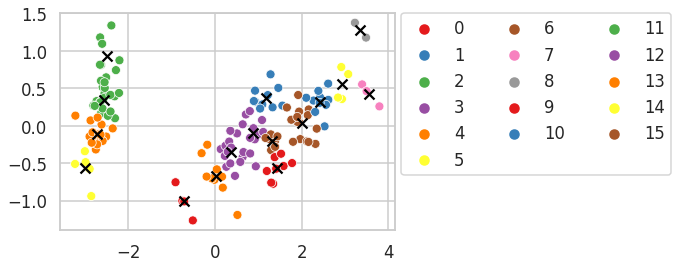

For 16 clusters, the average silhouette_score is : 0.3785246097488027 , the destortion function is : 0.2076802884043492 ,and inertia is : 8.388222484094626


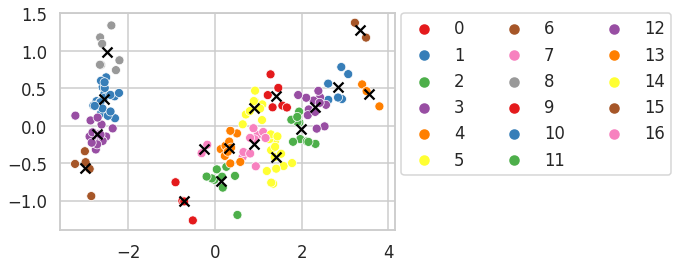

For 17 clusters, the average silhouette_score is : 0.3863995345535319 , the destortion function is : 0.20449052163177123 ,and inertia is : 7.78016749939969


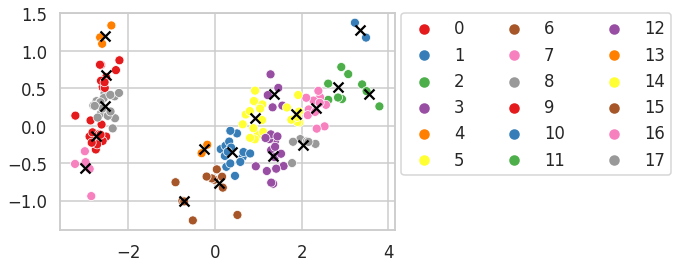

For 18 clusters, the average silhouette_score is : 0.3865147768174061 , the destortion function is : 0.20001887480070454 ,and inertia is : 7.4108729871773065


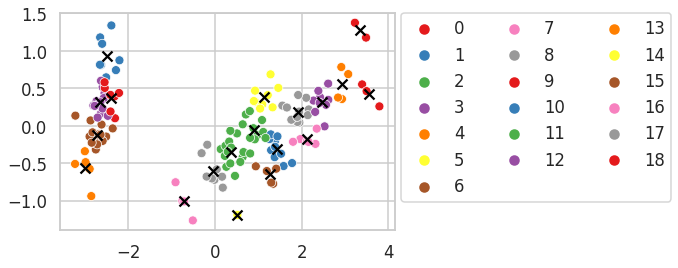

For 19 clusters, the average silhouette_score is : 0.3633745995961142 , the destortion function is : 0.18952156983890228 ,and inertia is : 6.8721721370248385


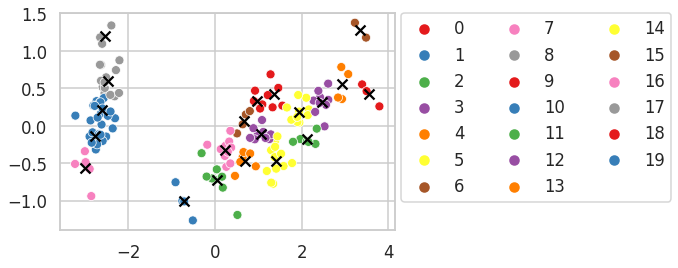

For 20 clusters, the average silhouette_score is : 0.37844742601501696 , the destortion function is : 0.17992476723581768 ,and inertia is : 6.478473298785021


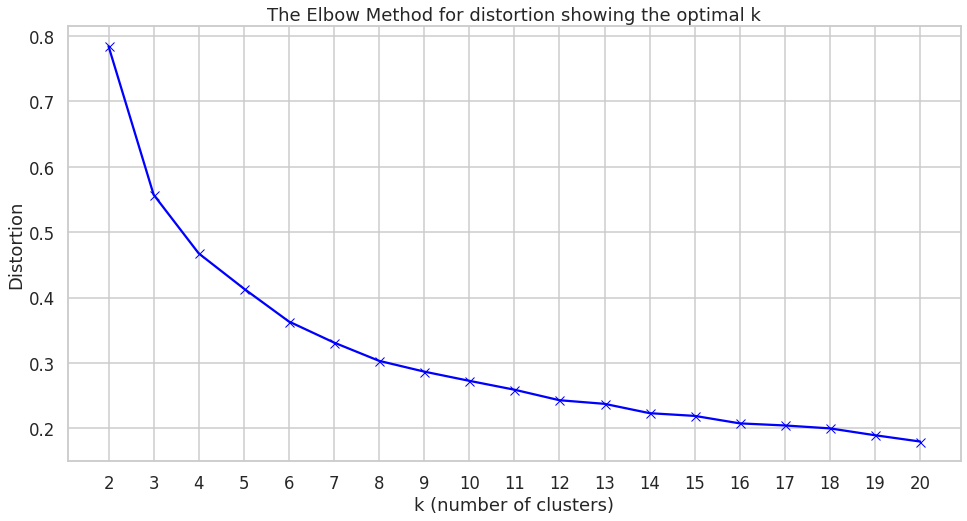

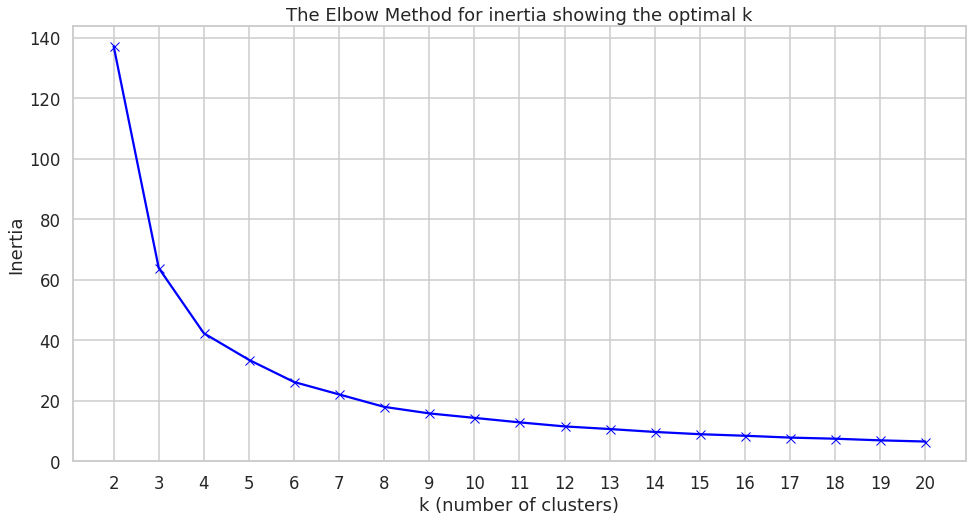

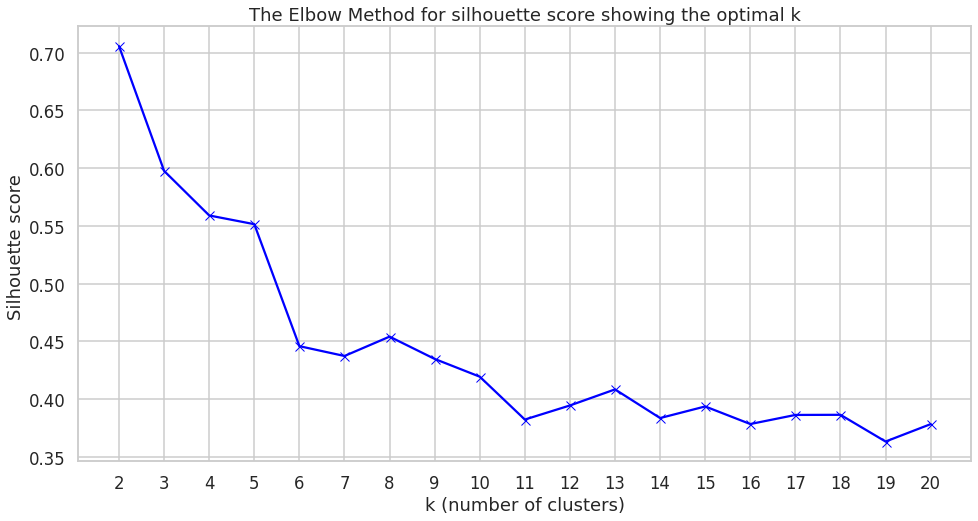

{'n_clusters': 2, 'silhouette_score': 0.7056703225102109}

In [20]:
K_mean(data_2d.values) # 2 the best silhouette_score and from the figures

## Customer dataset


In [5]:
df_Customer = pd.read_csv("/content/Customer data.csv",index_col = "ID")


In [6]:
df_Customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [7]:
df_Customer.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [50]:
df_Customer.nunique()

Sex                   2
Marital status        2
Age                  58
Education             4
Income             1982
Occupation            3
Settlement size       3
dtype: int64

not all features have the same scale 



In [53]:
scaler = StandardScaler()
# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df_Customer)

For 2 clusters, the average silhouette_score is : 0.24820106944568027 , the destortion function is : 2.174086997535681 ,and inertia is : 10514.607846424873
0    56.75
1    43.25
dtype: float64
For 3 clusters, the average silhouette_score is : 0.2711846855734802 , the destortion function is : 1.963991153563264 ,and inertia is : 8631.672547949453
0    42.95
1    42.95
2    14.10
dtype: float64
For 4 clusters, the average silhouette_score is : 0.26879180394522123 , the destortion function is : 1.7893352543407437 ,and inertia is : 7169.87082246584
2    35.25
3    28.50
0    23.10
1    13.15
dtype: float64
For 5 clusters, the average silhouette_score is : 0.2540800397305643 , the destortion function is : 1.68644813413083 ,and inertia is : 6403.134167928612
2    23.80
3    23.40
1    22.65
0    17.85
4    12.30
dtype: float64
For 6 clusters, the average silhouette_score is : 0.2593099839746033 , the destortion function is : 1.6334362454888003 ,and inertia is : 5869.255171914047
1    22.65
2 

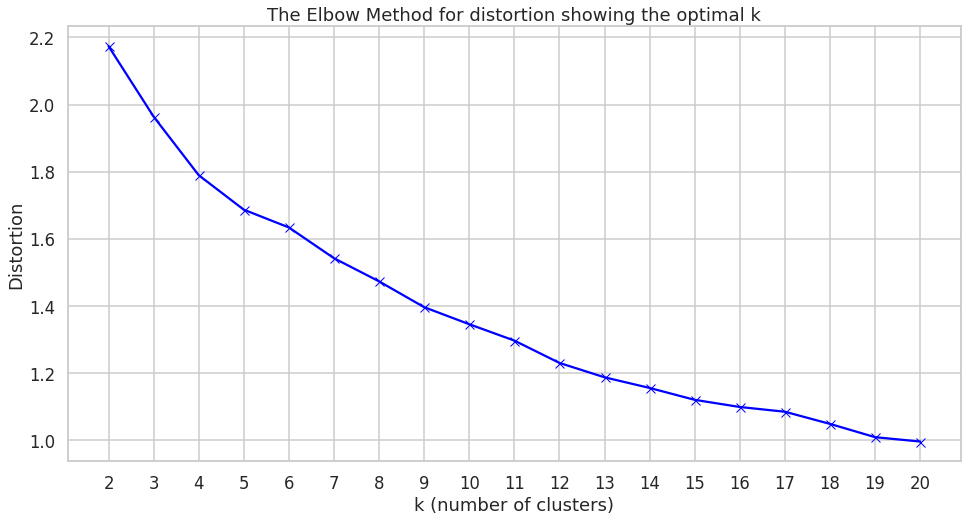

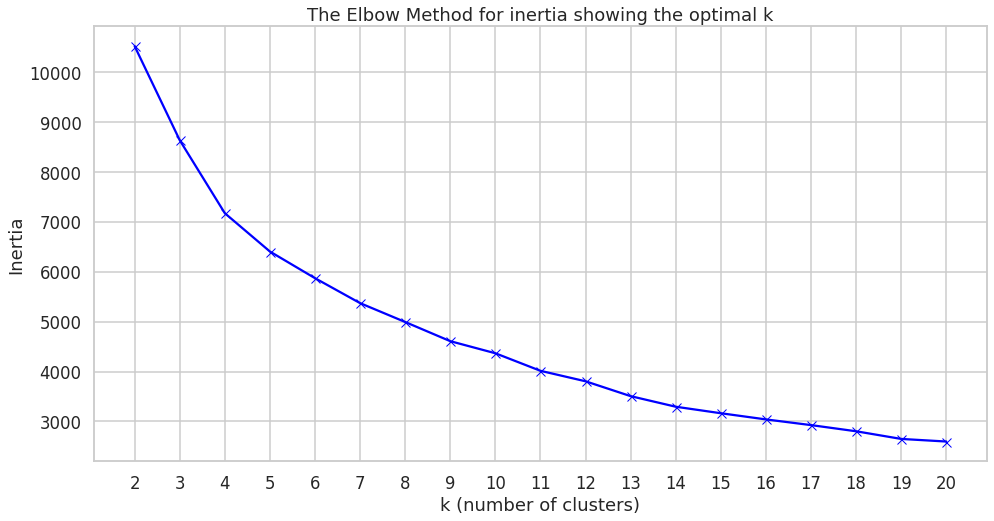

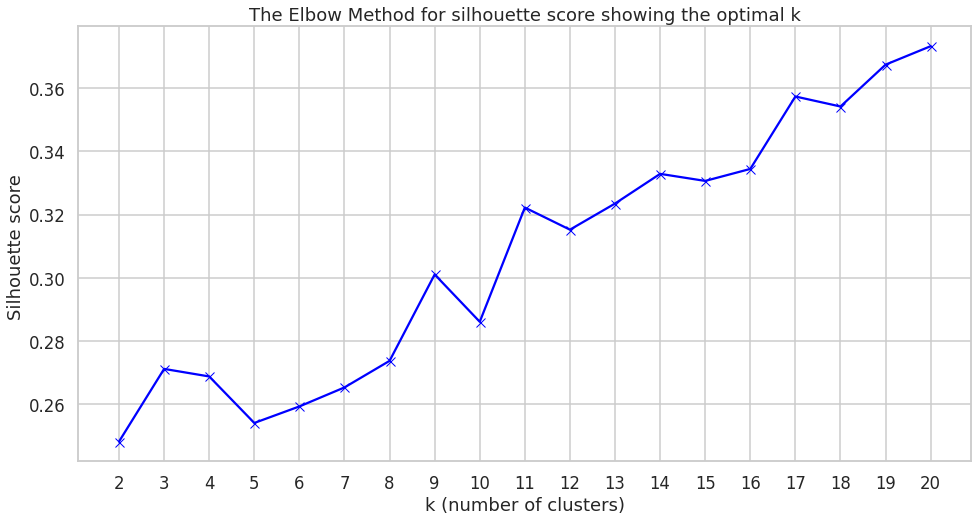

{'n_clusters': 20, 'silhouette_score': 0.37330815180141846}

In [54]:
K_mean(scaled_data) # 4 or 5 as the change in the distortion and ineria became very slow and also the mimimum cluster size is grater than 10% while 4 has higher silhouette_score than 5